# Convolutional Neural Network
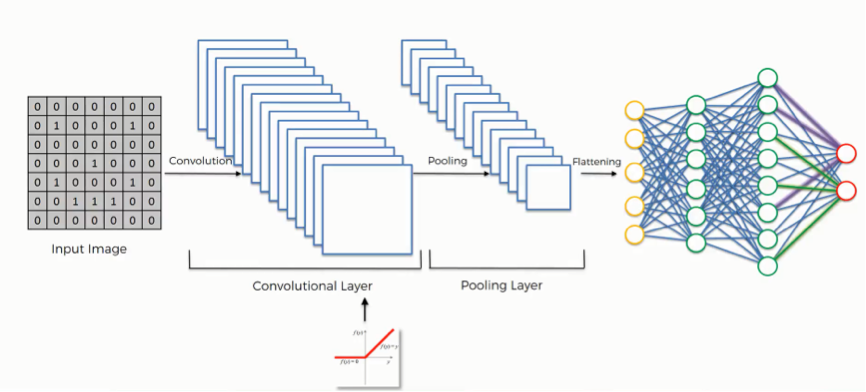

> A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing and analyzing visual data, such as images and videos. It's widely used in computer vision tasks like image classification, object detection, facial recognition, and more. CNNs are inspired by the human visual system, which processes visual information in a hierarchical and localized manner.

## The key components of a CNN are:
1. **Convolutional Layers:** These layers apply a set of learnable filters (also called kernels) to input data. These filters slide across the input data, performing element-wise multiplications and summations, which helps detect various features like edges, textures, and patterns.

2. **Activation Functions:** Activation functions like ReLU (Rectified Linear Unit) are applied after convolution to introduce non-linearity into the network, enabling it to learn more complex relationships in the data.

3. **Pooling Layers:** Pooling layers (typically max pooling) downsample the feature maps generated by convolutional layers. They help reduce the spatial dimensions while retaining the most important information. This aids in reducing computation and controlling overfitting.

4. **Fully Connected Layers:** After a series of convolutional and pooling layers, one or more fully connected (dense) layers are added for making final predictions or classifications based on the extracted features.

The typical architecture of a CNN consists of a stack of these layers, organized in a way that the network learns to detect low-level features in the early layers and progressively combines them to recognize more complex and high-level patterns in the later layers. This hierarchical feature learning is a key reason for the effectiveness of CNNs in tasks like image classification.

CNNs are trained using labeled data, where the network learns to adjust its internal parameters (weights and biases) through backpropagation and optimization algorithms to minimize the difference between its predictions and the actual ground truth labels. Popular CNN architectures include LeNet, AlexNet, VGGNet, GoogLeNet, ResNet, and more, each with its own innovations and improvements.

## Convolutional Layers

>A convolutional layer is a fundamental building block of a Convolutional Neural Network (CNN). It performs convolution operations on the input data, which are typically images or other grid-like data, to extract various features and patterns. These features become increasingly complex as the data passes through deeper layers of the network. Let's break down the key components and operations within a convolutional layer:

1. **Filters (Kernels):** A filter, also known as a kernel, is a small matrix with learnable weights. Filters are slid over the input data in a systematic manner, and at each position, an element-wise multiplication and sum of the filter's weights with the corresponding input values are performed. The result is a single value representing how well the filter matches a specific pattern in the input.

2. **Convolution Operation:** The convolution operation involves sliding the filter over the input data with a certain stride (the step size at which the filter moves). At each position, the filter's values are element-wise multiplied with the input data values that overlap with the filter. The element-wise products are summed up to produce a single value at that position in the output, which forms a feature map.

3. **Strides:** The stride determines how much the filter moves horizontally and vertically after each convolution operation. A larger stride leads to a smaller output size and less computation, while a smaller stride retains more spatial information but increases computational load.

4. **Padding:** Padding involves adding additional rows and columns of zeros around the input data before convolution. This is done to ensure that the output feature map has the same spatial dimensions as the input, as multiple convolution operations can otherwise cause the dimensions to shrink. Padding helps retain information at the borders of the input.

5. **Activation Function:** After the convolution operation, an activation function is typically applied element-wise to the resulting values in the feature map. Common activation functions include ReLU (Rectified Linear Unit), which sets negative values to zero and retains positive values as they are. This introduces non-linearity and helps the network learn more complex relationships.

The output of a convolutional layer is a set of feature maps that represent different extracted features from the input data. These features can range from simple patterns like edges and corners to more complex structures like textures and object parts. By stacking multiple convolutional layers, each with different filters, strides, and activation functions, the network can learn to detect increasingly abstract and high-level features, which are then used by subsequent layers for tasks like image classification or object detection.

In summary, convolutional layers are the heart of CNNs, responsible for extracting meaningful features from input data that enable the network to perform advanced visual recognition tasks.

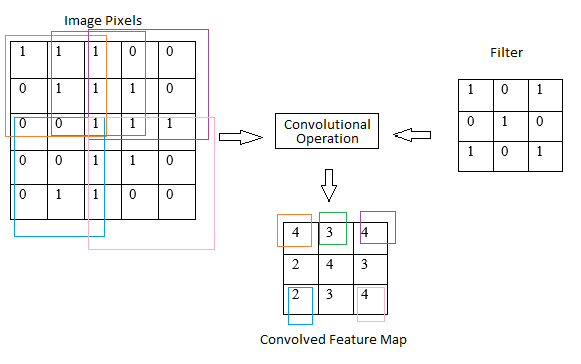

# Implementation

In this notebook we will implement convolution layer from scratch.

Note that we are only focusing on the implementation of a forward pass, since the deep learning frameworks like tensorflow, pytorch can handle backpropogation automatically using automatic differentiation.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from utils import plot_4D_tensor

# Set a specific random seed
random_seed = 42
tf.random.set_seed(random_seed)

2023-08-26 15:55:54.871777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 15:55:54.921140: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 15:55:54.922509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 15:55:55.839564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


##  Zero Padding
Zero padding refers to the practice of adding extra empty values, usually zeros, to the beginning, end, or sides of data. It is done to control the output size of the data after applying convolution operation.

`tf.pad(
tensor, paddings, mode='CONSTANT', constant_values=0, name=None
)`

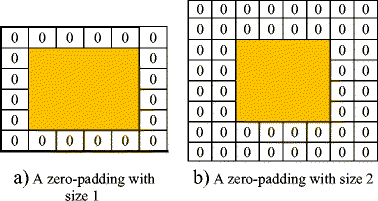

In [2]:
input_data = tf.constant([[1,2,3],
                          [1,2,3]])
print("input data: ")
print(input_data.numpy())
print("input data shape: ", input_data.shape)
print("===============")
pad_input = tf.pad(input_data, 
                  paddings=([1,2], [3,4]))
# here, paddings = ([pad_top, pad_bottom], [pad_left, pad_right])
# note that first item i.e [1,2] is for first dimension i.e row, and [3,4] is for second dimension,
# we can add paddings to any dimension

print("padded input: ")
print(pad_input.numpy())
print("padded input shape:", pad_input.shape)

input data: 
[[1 2 3]
 [1 2 3]]
input data shape:  (2, 3)
padded input: 
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0 0]
 [0 0 0 1 2 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
padded input shape: (5, 10)


I have created plot_4D_tensor utility function to visualize 4D tensor, let's see how pad on different dimension actually works

In [3]:
r = tf.zeros((2, 2))
g = tf.ones((2, 2)) * 5
b = tf.ones((2, 2)) * 10
image1 = tf.stack([r,g,b], axis=-1)
image2 = tf.stack([r,g, b], axis=-1)
image1.shape, image2.shape

(TensorShape([2, 2, 3]), TensorShape([2, 2, 3]))

In [4]:
tensor = tf.stack([image1, image2], axis=0)
tensor.shape

TensorShape([2, 2, 2, 3])

In [5]:
pad_tensor = tf.pad(tensor, paddings=([1, 1], [1, 1], [1, 1], [1, 1]))

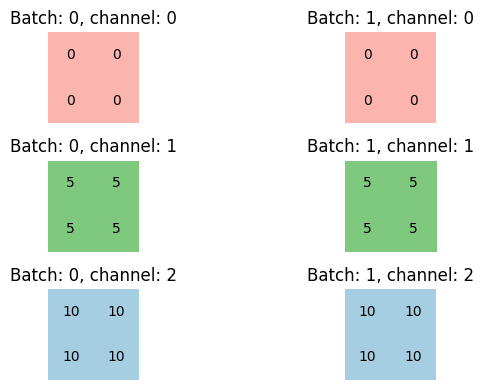

In [6]:
# ploting original tensor
plot_4D_tensor(tensor, figsize=(8, 4))

You may want to compare the above plot with this familiar representation
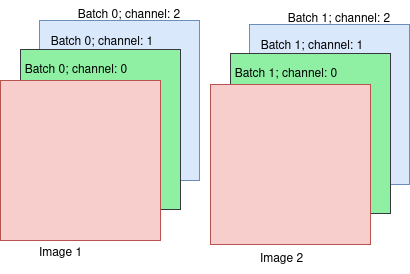

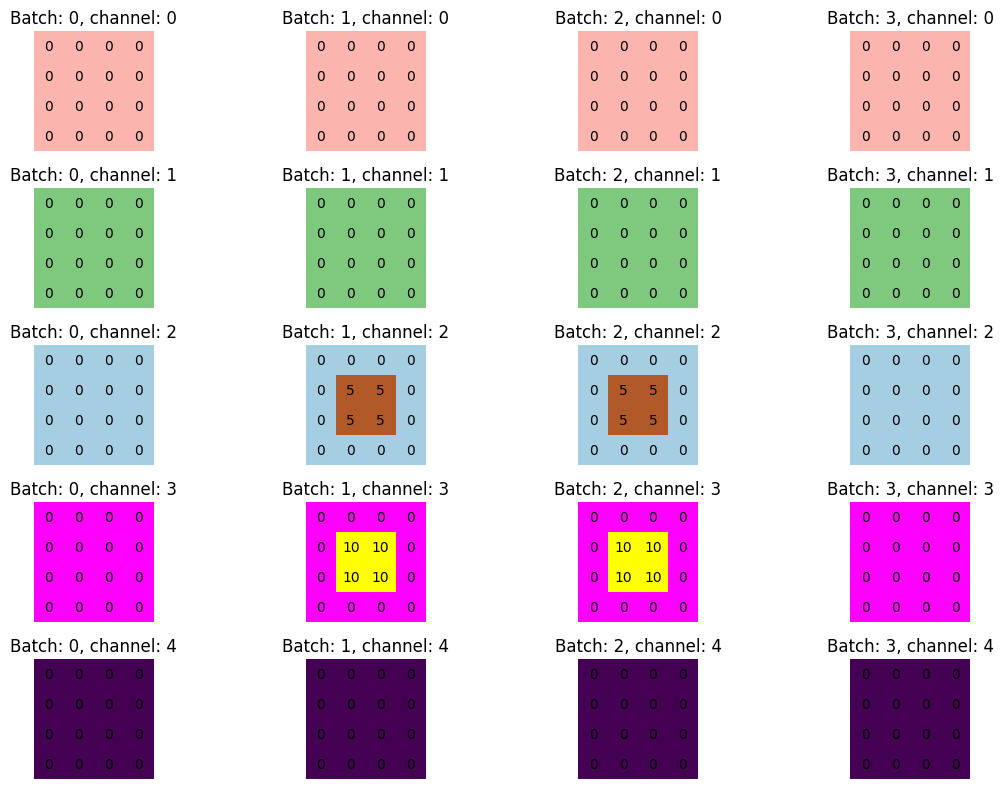

In [7]:
plot_4D_tensor(pad_tensor)

In [8]:
pad_tensor.shape

TensorShape([4, 4, 4, 5])

**Explaination:**
   - Initially we have batch size of 2, once we have applied padding in the batch dimension we get additional batch in the front and back, note that since we have applied zero padding we get every value zeros.
   - similarly, initially we have 2 channels, and after applying padding on channel dimension (last dimension) we get additional channel that is on the top and bottom of each batch.
   - try to interpret how padding is applied on height and width dimension.

## Helper function
Let's create a padding to 4-dim tensor, this function will be used for adding paddings to the actual inputs we pass to the conv2D layer which will be of shape `(batch, height, width, num_channel)`

In [9]:
# let's wrap the padding inside a function
def zero_pad(input_data, padding):
    """
    Apply zero-padding to a TensorFlow tensor.

    Args:
        input_data (tf.Tensor): The input tensor to be padded.
        padding (tuple): A tuple of two integers representing the 
                padding amounts for the row (h) and cols (w) dimensions.

    Returns:
        tf.Tensor: The padded tensor.
    """
    # tries to pad evenly top and bottom, 
    # but if the amount of rows to be added is odd, it will add the extra column to the bottom
    padding_h_top, padding_h_bottom = tf.math.floor(padding[0]/2), tf.math.ceil(padding[0]/2)
    
    # tries to pad evenly left and right, 
    # but if the amount of column to be added is odd, it will add the extra column to the right
    padding_w_left, padding_w_right = tf.math.floor(padding[1]/2), tf.math.ceil(padding[1]/2)
    
    # since we do not want to add paddings to the first dimension i.e batch size, thus [0, 0]
    # similarly we do not want to add paddings to the last dimension i.e channel, thus [0, 0] 
    return tf.pad(input_data, ([0, 0],
                               [padding_h_top, padding_h_bottom],
                               [padding_w_left, padding_w_right],
                               [0, 0]))

In [10]:
input_data = tf.constant(
            [
             [[[1],
               [2],
               [3]],
              [[4],
               [5],
               [6]]]]
)
print("input data: ")
print(input_data.numpy())
print("Input shape:", input_data.shape)

print("==============")
pad_input_1 = zero_pad(input_data, (1, 1))
print("padded input:")
print(pad_input_1)
print("padded input shape: ", pad_input_1.shape)

print("==============")
pad_input_2 = zero_pad(input_data, (3, 2))
print("padded input:")
print(pad_input_2)
print("padded input shape: ", pad_input_2.shape)


input data: 
[[[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]]]
Input shape: (1, 2, 3, 1)
padded input:
tf.Tensor(
[[[[1]
   [2]
   [3]
   [0]]

  [[4]
   [5]
   [6]
   [0]]

  [[0]
   [0]
   [0]
   [0]]]], shape=(1, 3, 4, 1), dtype=int32)
padded input shape:  (1, 3, 4, 1)
padded input:
tf.Tensor(
[[[[0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [1]
   [2]
   [3]
   [0]]

  [[0]
   [4]
   [5]
   [6]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [0]]]], shape=(1, 5, 5, 1), dtype=int32)
padded input shape:  (1, 5, 5, 1)


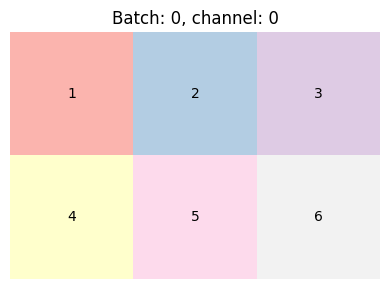

In [11]:
# plot original input
plot_4D_tensor(input_data, figsize=(4,4))

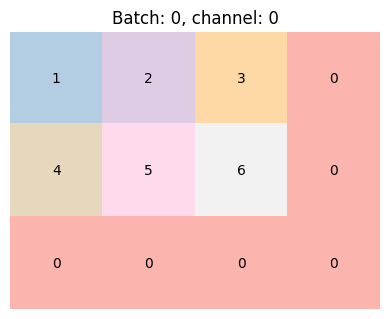

In [12]:
# plot padded input 2 # padding(1, 1)
plot_4D_tensor(pad_input_1, figsize=(4,4))

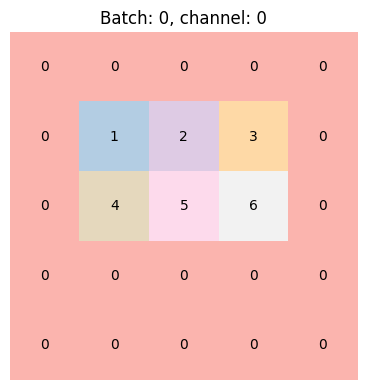

In [13]:
# plot padded input 2 #padding (3, 2)
plot_4D_tensor(pad_input_2, figsize=(4,4))

## output shape calculation
Before moving forward, if you are not familiar with convolution operation, please check that out first.
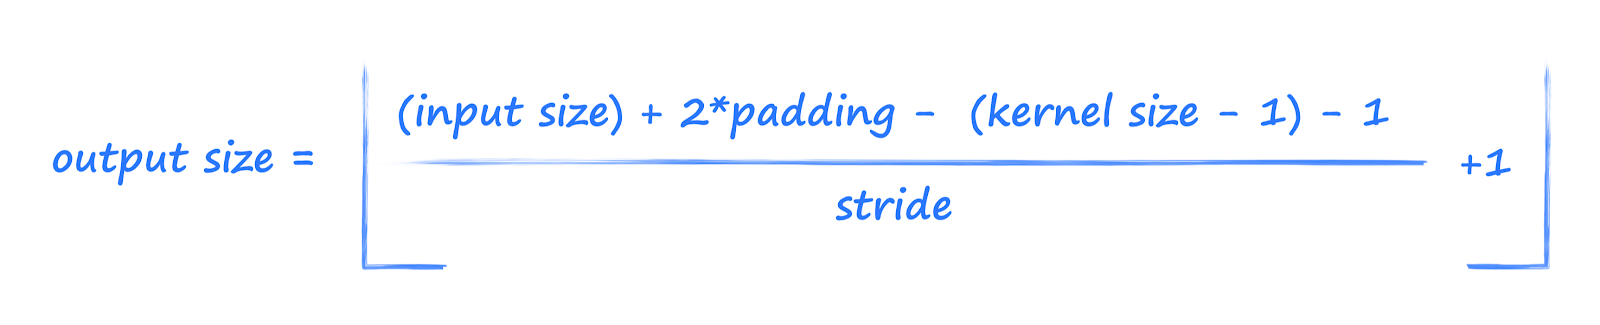

In [14]:
def calc_output_dim(input_shape, kernel_shape, paddings, strides):
    """
    Calculate the output dimensions of a convolutional layer.

    Args:
        input_shape (tuple): Input dimensions (height, width).
        kernel_shape (tuple): Kernel dimensions (height, width).
        padding (tuple): Padding dimensions (height_pad, width_pad).
        stride (tuple): Stride dimensions (vertical_stride, horizontal_stride).

    Returns:
        tuple: Output dimensions (output_height, output_width).

    Raises:
        ValueError: If stride values are less than 1 or paddings values or negative.
    """
    if strides[0] < 1 or strides[1] < 1:
        raise ValueError("Stride needs to be greater than or equal to 1")
    
    # Calculate output dimensions for 2D convolution
    output_height = (input_shape[0] + 2 * paddings[0] - kernel_shape[0]) // strides[0] + 1
    output_width = (input_shape[1] + 2 * paddings[1] - kernel_shape[1]) // strides[1] + 1

    return output_height, output_width

In [15]:
calc_output_dim(input_shape=(20, 20),
                kernel_shape=(3, 3),
                paddings=(1, 1),
                strides=(2, 2))

(10, 10)

In [16]:
calc_output_dim(input_shape=(19, 19),
                kernel_shape=(3, 3),
                paddings=(0, 0),
                strides=(2, 2))

(9, 9)

If you have already worked with conv2D layer then you may be familiar with `SAME` and `VALID` paddings, if not it is okay, I will explain it.

You can also check out this stackover thread : https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t


## Padding: SAME
- When padding is set to "SAME" then it will add extra zero paddings, so that the output size remains same as the input size when stride = 1.
- Using ‘SAME’ ensures that the filter is applied to all the elements of the input.

```                pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|
```
In this example:
- `Input width` = 13
- `Filter width` = 6
- `Stride` = 5
- `output width` = 3

## Padding: VALID
- Valid padding means no padding.
- Valid padding ensures that the kernel does not exceed the input image while applying convolution operation. 
```
   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|

```
In this example:
- `Input width` = 13
- `Filter width` = 6
- `Stride` = 5
- `output width` = 2

In [17]:
# let's implement a function that computes the output size when padding is SAME
def same_padding(input_shape, kernel_shape, strides):
    """
    Calculate the output dimension after applying 'SAME' padding in a convolutional layer.

    Args:
        input_shape (tuple): Input dimensions (height, width).
        kernel_shape (tuple): Kernel dimensions (height, width).
        strides (tuple): Stride dimensions (vertical_stride, horizontal_stride).

    Returns:
        tuple: Padding dimensions (padding_height, padding_width).
    """
    # calculate how many times stride can be applied, which is basically the output size 
    # ceil ensure that all elements get covered
    output_h = tf.math.ceil(input_shape[0]/strides[0])
    output_w = tf.math.ceil(input_shape[1]/strides[1])

    # This formula is derived from above output shape calculation formula
    # The formula (output_w - 1) * strides[0] + kernel_dim[0] calculates the effective height of 
    # the output feature map after convolution.
    # Note that Subtracting input_dim[0] from it gives the required padding for the width. 
    pad_h = max(0, (output_h - 1) * strides[0] + kernel_shape[0] - input_shape[0])
    
    # Similarly, the same is done for the width.
    pad_w = max(0, (output_w - 1) * strides[1] + kernel_shape[1] - input_shape[1])
    
    return (int(output_h), int(output_w)), (int(pad_h), int(pad_w))

In [18]:
same_padding(input_shape=(1, 13), 
         kernel_shape=(1, 6),
         strides=(1, 5))

((1, 3), (0, 3))

In [19]:
calc_output_dim(input_shape=(1, 13),
                kernel_shape=(1, 6),
                strides=(1, 5),
                paddings=(0, 3))

(1, 3)

In [20]:
def valid_padding(input_shape, kernel_shape, strides):
    """
    Calculate the output dimensions for a convolutional layer with 'VALID' padding.

    Args:
        input_shape (tuple): Input dimensions (height, width).
        kernel_shape (tuple): Kernel dimensions (height, width).
        strides (tuple): Stride dimensions (vertical_stride, horizontal_stride).

    Returns:
        tuple: Output dimensions (output_height, output_width).
    """
    output_h = int(((input_shape[0] - kernel_shape[0]) // strides[0]) + 1)
    output_w = int(((input_shape[1] - kernel_shape[1]) // strides[1]) + 1)
    
    # output shape and padding shape
    # since valid padding means no padding at all
    return (output_h, output_w), (0, 0)

In [21]:
valid_padding((1, 13), (1, 6), (1, 5))

((1, 2), (0, 0))

In [22]:
calc_output_dim(input_shape=(1, 13),
                kernel_shape=(1, 6),
                strides=(1, 5),
                paddings=(0, 0))

(1, 2)

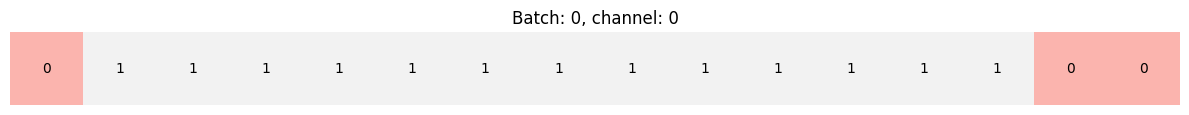

In [23]:
after_same_pad = zero_pad(tf.ones((1,1,13,1)), padding=(0, 3))
plot_4D_tensor(after_same_pad)

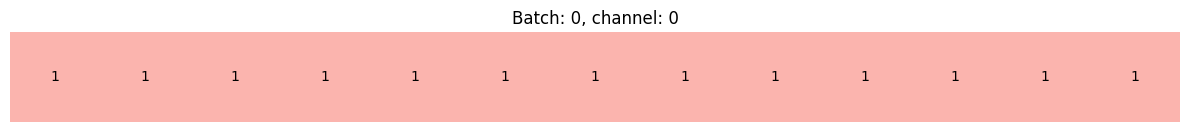

In [24]:
after_valid_pad = zero_pad(tf.ones((1, 1, 13, 1)), (0, 0))
plot_4D_tensor(after_valid_pad)

## Convolution single step
Implement single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolution unit, which
- Takes input slice volume
- Perform element wise matrix multiplication between 3D input slice and 3D weights
- apply reduce sum and add bias value
- Output another volume

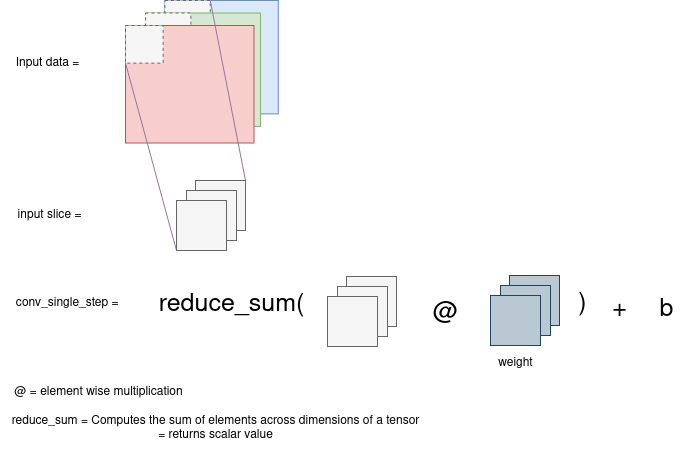

In [25]:
tf.math.multiply([[1,2,3], [1,2,3]], [[2, 2, 2], [3, 3, 3]]) # element-wise multiplication

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 4, 6],
       [3, 6, 9]], dtype=int32)>

In [26]:
tf.math.reduce_sum([[1,2,3], [1,2,3]]) # sum all elements

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [27]:
tf.constant([[[1, 2]]]).shape

TensorShape([1, 1, 2])

In [28]:
tf.squeeze([[[1, 2]]]) #emove the one-dimensional entry from the original shape of the array

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [29]:
def conv_single_step(input_slice, W, b):
    """
    input_slice shape: (k, k, n_c_prev)
    W shape: (k, k, n_c_prev)
    b shape: (1, 1, 1)
    """
    
    # element wise multiplication between input_slice and W
    ele_mul = tf.math.multiply(input_slice, W)
    
    # sum over all entries
    Z = tf.math.reduce_sum(ele_mul)
    # add bias
    b = tf.squeeze(b)
    Z += b
    return Z

In [30]:
input_slice = tf.ones((5, 5, 3))
W = tf.ones((5, 5, 3))
b = tf.ones((1, 1, 1))

conv_single_step(input_slice, W, b)

<tf.Tensor: shape=(), dtype=float32, numpy=76.0>

## Convolution Neural Network forward pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume

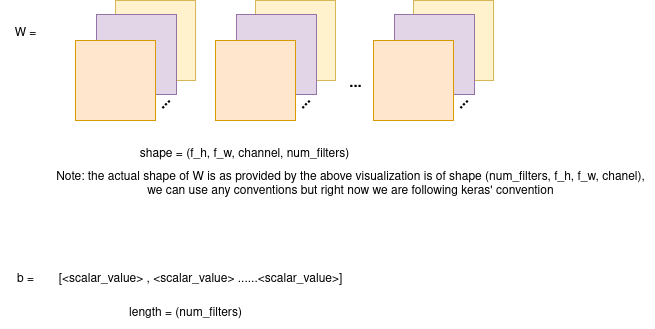

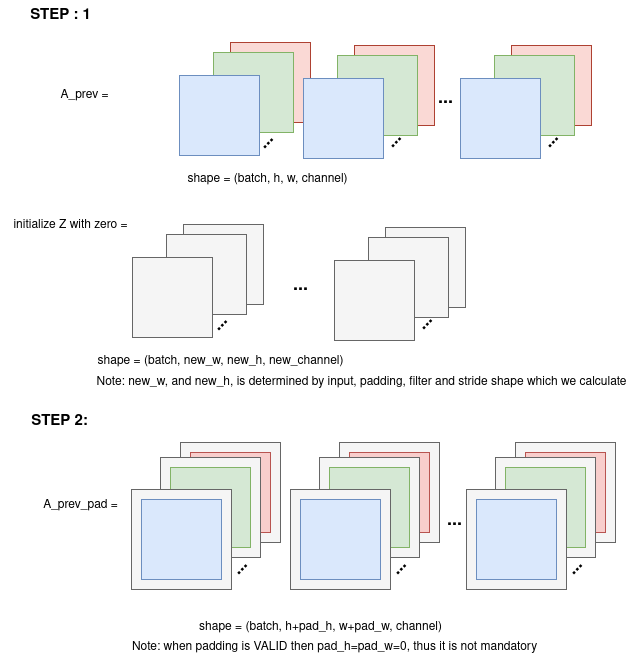

In next step we perform 3D convolution operation, it is hard to depict that into pictures.

In [72]:
def conv_forward(A_prev, W, b, stride, padding):
    # retrieve dim of A_prev
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape # (batch_size, height, width, channals)
    
    # retrive kernel dim
    (f, f, n_C_prev, n_C) = W.shape
    
    # calculate output shape
    input_dim = [n_H_prev, n_W_prev]
    kernal_dim = [f, f]
    
    stride = [stride, stride]
    
    if padding == "same":
        (n_H, n_W), padding = same_padding(input_dim, kernal_dim, stride)
    elif padding == "valid":
        (n_H, n_W), padding = valid_padding(input_dim, kernal_dim, stride)
    else:
        padding = [padding, padding]
        n_H, n_W = calc_output_dim(input_dim, kernal_dim, padding, stride) 

#     print(n_H, n_W, padding)
    
    # initialize output volume
    Z = tf.Variable(tf.zeros((m, n_H, n_W, n_C)))
#     print(Z)
    # create A_prev padding
#     print(padding)
#     print(A_prev.shape)
    A_prev_pad = zero_pad(A_prev, padding)
#     print(A_prev_pad.shape)
    
    # perform convolution operation
    for i in range(m): # loop over the batch of the training example
         # Extract the padded input feature map for the i-th training example
        a_prev = A_prev_pad[i]
        for h in range(n_H):
            vert_start = stride[0] * h
            vert_end = vert_start + f
            
            for w in range(n_W):
                horiz_start  = stride[1] * w
                horiz_end = horiz_start + f
                
                a_slice_prev = a_prev[vert_start:vert_end, horiz_start:horiz_end, :]
                # Loop over the channels (depth) of the output feature map
                # here we are applying n_filters to the same a_slice_prev
                for c in range(n_C):
                    weights = W[:,:,:, c]
                    bias = b[:,:,:, c]
                    Z = Z[i, h, w, c].assign(conv_single_step(a_slice_prev, weights, bias))
    return Z

In [73]:
# testing
A_prev = tf.ones((2, 10, 10, 3))
W = tf.ones((3, 3, 3, 10))
b = tf.zeros((1, 1, 1, 10))
stride = 2
padding = "valid"
Z = conv_forward(A_prev, W, b, stride, padding)
Z.shape

TensorShape([2, 4, 4, 10])

# Let's Wrap it into a class

- I have removed comments and docstrings inorder for readability.
- You can check out "overview.ipynb" to understand how to create custom layers in tensorflow core and keras. 

In [74]:
class Conv2D(tf.keras.layers.Layer):
    def __init__(self,
                 filters,
                 kernel_shape,
                 strides,
                 paddings,
                 kernel_initializer="glorot_uniform",
                 bias_initializer="zeros", **kwargs):
        
        super().__init__(**kwargs)
        self.n_filters = filters
        self.kernel_shape = kernel_shape
        self.strides = strides
        self.paddings = paddings
        self.kernel_initializer = kernel_initializer
        self.bias_initializer = bias_initializer
    
    def build(self, input_shape):
        m, n_H_prev, n_W_prev, n_C_prev = input_shape
        
        self.W = self.add_weight(
            shape=(self.kernel_shape[0],
                   self.kernel_shape[1],
                   n_C_prev, self.n_filters),
            initializer= self.kernel_initializer,
            trainable=True
        )
        
        self.b = self.add_weight(
            shape=(self.n_filters),
            initializer= self.bias_initializer,
            trainable=True
        )
    
    def _zero_pad(self, input_data):
        half_padding_h= self.paddings[0]/2
        half_padding_w = self.paddings[1]/2
        padding_h_top, padding_h_bottom = tf.math.floor(half_padding_h), tf.math.ceil(half_padding_h)
        padding_w_left, padding_w_right = tf.math.floor(half_padding_w), tf.math.ceil(half_padding_w)
        return tf.pad(input_data, ([0, 0],
                                   [padding_h_top, padding_h_bottom],
                                   [padding_w_left, padding_w_right],
                                   [0, 0]))

    def _calc_output_shape(self, input_shape):
        if self.strides[0] < 1 or self.strides[1] < 1:
            # stride needs to be >= 1
            raise ValueError("stride need to be greater than equals to 1")
        # for 2D
        w = (input_shape[0] + 2 * self.paddings[0] - self.kernel_shape[0]) // self.strides[0] + 1
        h = (input_shape[1] + 2 * self.paddings[1] - self.kernel_shape[1]) // self.strides[1] + 1
        return (int(w), int(h))
    
    def _valid_padding(self, input_shape):
        output_h = int(((input_shape[0] - self.kernel_shape[0]) // self.strides[0]) + 1)
        output_w = int(((input_shape[1] - self.kernel_shape[1]) // self.strides[1]) + 1)
        return (output_h, output_w), (0, 0)
    
    def _same_padding(self, input_shape):
        output_h = tf.math.ceil(input_shape[0]/self.strides[0])
        output_w = tf.math.ceil(input_shape[1]/self.strides[1])
        pad_h = max(0, (output_h - 1) * self.strides[0] + self.kernel_shape[0] - input_shape[0])

        # Similarly, the same is done for the width.
        pad_w = max(0, (output_w - 1) * self.strides[1] + self.kernel_shape[1] - input_shape[1])

        return (int(output_h), int(output_w)), (int(pad_h), int(pad_w))
    
    def _conv_single_step(self, input_slice, W, b):
        # element wise multiplication between input_slice and W
        ele_mul = tf.math.multiply(input_slice, W)

        # sum over all entries
        Z = tf.math.reduce_sum(ele_mul)
        # add bias
        b = tf.squeeze(b)
        Z += b
        return Z
    
    def _conv_forward(self, A_prev):
        # retrieve dim of A_prev
        m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape # (batch_size, height, width, channals)

        # retrive kernel dim
        (f, f, n_C_prev, n_C) = W.shape

        # calculate output shape
        input_shape = [n_H_prev, n_W_prev]

        if self.paddings == "same":
            (n_H, n_W), self.paddings = self._same_padding(input_shape)
        elif self.paddings == "valid":
            (n_H, n_W), self.paddings = self._valid_padding(input_shape)
        else:
            n_H, n_W = self._calc_output_shape(input_shape) 

        # initialize output volume
        Z = tf.Variable(tf.zeros((m, n_H, n_W, n_C)))
        A_prev_pad = self._zero_pad(A_prev)

        for i in range(m): # loop over the batch of the training example
            a_prev = A_prev_pad[i]
            for h in range(n_H):
                vert_start = self.strides[0] * h
                vert_end = vert_start + f

                for w in range(n_W):
                    horiz_start  = self.strides[1] * w
                    horiz_end = horiz_start + f

                    for c in range(n_C):
                        a_slice_prev = a_prev[vert_start:vert_end, horiz_start:horiz_end, :]
                        weights = self.W[:,:,:, c]
                        bias = self.b[c]
                        Z = Z[i, h, w, c].assign(self._conv_single_step(a_slice_prev, weights, bias))
        return Z
    
    def call(self, x):
        return self._conv_forward(x)

In [53]:
conv2d = Conv2D(filters=10, kernel_shape=(3, 3), strides=(3, 3), paddings="same")

In [54]:
input_x = tf.random.uniform(shape=(2, 10, 10, 3), minval=1, maxval=5, dtype=tf.float32)
print(input_x.shape)
output_x = conv2d(input_x)

(2, 10, 10, 3)


In [55]:
output_x.shape

TensorShape([2, 4, 4, 10])

# Cross verifying with keras conv2D

In [56]:
from tensorflow import keras

In [57]:
conv2d_keras = keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(3, 3), padding="same")

In [58]:
output_x_keras = conv2d_keras(input_x)
output_x_keras.shape

TensorShape([2, 4, 4, 10])

Both our conv2D and keras's conv2D gave the same output shape i.e (2, 4, 4, 10)

In [59]:
# output_x != output_x_keras since weight initialization is random
# tf.reduce_all(output_x == output_x_keras)

In [60]:
# both our conv2D and and kera's conv2D has the same weight shape
conv2d_keras.weights[0].shape, conv2d.weights[0].shape

(TensorShape([3, 3, 3, 10]), TensorShape([3, 3, 3, 10]))

In [61]:
conv2d_keras.weights[1].shape, conv2d.weights[1].shape

(TensorShape([10]), TensorShape([10]))

In [62]:
tf.reduce_all(conv2d_keras.weights[0] == conv2d.weights[0])

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [63]:
output_x_keras[1,:,:,1]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[-0.09702338, -0.6665019 ,  0.77456665, -0.7446667 ],
       [ 2.605927  ,  1.5415763 ,  2.4911456 ,  0.7644628 ],
       [ 2.8484259 ,  1.2808096 ,  2.4788208 ,  0.7970844 ],
       [ 2.471807  ,  1.9631627 ,  3.362881  ,  0.66051114]],
      dtype=float32)>

In [64]:
output_x[1,:,:,1]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 1.0118657 ,  1.1336617 , -0.45151836,  0.88602656],
       [ 1.1284561 ,  4.276835  ,  3.236095  ,  1.87446   ],
       [ 0.93426985,  2.3074193 ,  3.474651  ,  2.968304  ],
       [ 1.5782701 ,  1.1322267 ,  0.65563154,  1.0351448 ]],
      dtype=float32)>